## Agglomerative Hierarchical Clustering

* Here, we observe that the distances between P2 and P3, as well as P7 and P8, are the smallest. Therefore, we group P2 and P3 into a cluster and assign a new point label, P11. Similarly, P7 and P8 are grouped into a cluster and assigned the label P12. Next, we determine the closest distances for the remaining points. For instance, the distance between P1 and P11 is calculated as 
distance(P1,P11)=$\min(∣P1−P2∣,∣P1−P3∣)$. This process is repeated iteratively until all points are merged into a single large cluster, as illustrated in the figure below.
* Advantage: AHC does not require specifying the number of clusters in advance before clustering.
* Disadvantage: It can be time-consuming to calculate pairwise distances and group all the points beforehand.

<img src="ahc.png" alt="Agglomerative Hierarchical clustering" width="550">

[[ 1.          2.          1.          2.        ]
 [ 6.          7.          1.          2.        ]
 [ 4.          5.          1.          2.        ]
 [ 0.         10.          1.41421356  3.        ]
 [11.         13.          1.41421356  5.        ]
 [ 3.          9.          1.41421356  2.        ]
 [ 8.         15.          1.41421356  3.        ]
 [12.         16.          2.23606798  5.        ]
 [14.         17.          3.60555128 10.        ]]


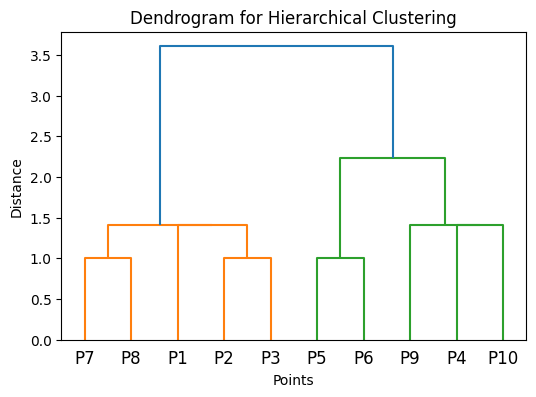

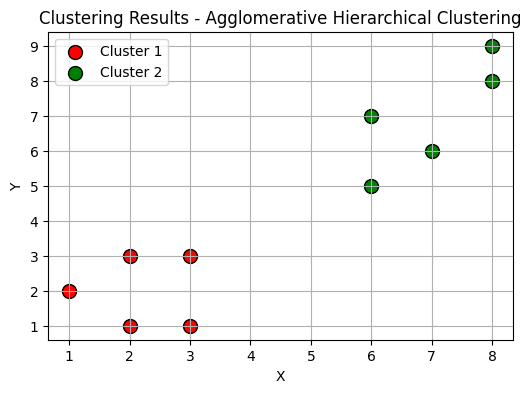

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Step 1: Define the points (P1, P2, ..., P10)
points = np.array([
    [1, 2],  # P1
    [2, 3],  # P2
    [3, 3],  # P3
    [6, 5],  # P4
    [8, 8],  # P5
    [8, 9],  # P6
    [2, 1],  # P7
    [3, 1],  # P8
    [6, 7],  # P9
    [7, 6]   # P10
])

# Step 2: Compute pairwise distances using Euclidean distance
distances = pdist(points, metric='euclidean')

# Step 3: Create a linkage matrix using single linkage
linkage_matrix = linkage(distances, method='single')
print(linkage_matrix)

# Step 4: Visualize the dendrogram to show the merging process
plt.figure(figsize=(6, 4))
dendrogram(linkage_matrix, labels=[f'P{i+1}' for i in range(len(points))])
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()

# Step 5: Get the cluster assignments (for example, 3 clusters)
clusters = fcluster(linkage_matrix, t=2, criterion='maxclust')

# Step 6: Plot the points with their cluster assignments
# Assign a color for each cluster
unique_clusters = np.unique(clusters)
colors = ['r', 'g', 'b', 'y', 'c', 'm']  # Colors for clusters

plt.figure(figsize=(6, 4))
for i, cluster in enumerate(unique_clusters):
    # Plot points that belong to the current cluster
    cluster_points = points[clusters == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                color=colors[i], label=f'Cluster {cluster}', s=100, edgecolors='k')

# Adding labels and title
plt.title("Clustering Results - Agglomerative Hierarchical Clustering")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()